# Prof. Pedram Jahangiry

You need to make a copy to your own Google drive if you want to edit the original notebook! Start by opening this notebook on Colab 👇

<a href="https://colab.research.google.com/github/PJalgotrader/Machine_Learning-USU/blob/main/Lectures%20and%20codes/Module%209-%20CART/Python/DTs_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a> 



![logo](https://upload.wikimedia.org/wikipedia/commons/4/44/Huntsman-Wordmark-with-USU-Blue.gif#center) 


## 🔗 Links

[![linkedin](https://img.shields.io/badge/LinkedIn-0A66C2?style=for-the-badge&logo=linkedin&logoColor=white)](https://www.linkedin.com/in/pedram-jahangiry-cfa-5778015a)

[![Youtube](https://img.shields.io/badge/youtube_channel-1DA1F2?style=for-the-badge&logo=youtube&logoColor=white&color=FF0000)](https://www.youtube.com/channel/UCNDElcuuyX-2pSatVBDpJJQ)

[![Twitter URL](https://img.shields.io/twitter/url/https/twitter.com/PedramJahangiry.svg?style=social&label=Follow%20%40PedramJahangiry)](https://twitter.com/PedramJahangiry)


---

# Decision Trees Classification

Importing the packages:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()  #if you want to use seaborn themes with matplotlib functions
import warnings
warnings.filterwarnings('ignore')

In [2]:
rand_state = 1000

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/PJalgotrader/Machine_Learning-USU/main/data/Social_Network_Ads.csv')

In [4]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [6]:
# first we look at target variable proportions:
pd.crosstab(df['Purchased'],df['Purchased'], normalize='all')*100

Purchased,0,1
Purchased,,
0,64.25,0.00
1,0.00,35.75


## Data preprocessing 

In [7]:
df.isna().sum()  

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [8]:
df.drop('User ID',axis=1, inplace=True)

### Dealing with categorical variables:
In DTs models, we don't need to transfer the categorical variables into dummy variables. However, The DecisionTreeRegressor or DecisionTreeClassifier from scikit-learn (sklearn) cannot directly handle categorical features that are represented as strings. Scikit-learn's decision trees and other algorithms expect numerical input, so you'll need to convert categorical string features into a numerical format before feeding them into the model.

Here are common ways to handle categorical string features:

1. **Label Encoding**: Each unique category in a feature is assigned an integer value. This approach is simple but can introduce a false sense of order or distance between categories, which might not be desirable.

2. **One-Hot encoding**: Each category is transformed into a new binary column (0 or 1). This method avoids the issue of imposing an artificial order but can lead to a high number of features if the categorical variable has many unique values.

3. **Ordinal Encoding**: Similar to label encoding but used when the categorical variable has a known order (ordinal data). Here, the integers assigned have a meaningful order.



In [9]:
# Let's use label encoding for the 'Gender' variable here:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [10]:
label_encoder.fit_transform(df['Gender'])

array([1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0,

In [11]:
label_encoder.classes_

array(['Female', 'Male'], dtype=object)

Renaming the Gender column to Male to make it more intuitive:

In [12]:
df['Male'] = label_encoder.fit_transform(df['Gender']) 
# becuase we have only two classes, we could have simply used some mapping like this:
# df['Male'] = df['Gender'].map({'Male':1, 'Female':0})


In [13]:
df.head()

,Gender,Age,EstimatedSalary,Purchased,Male
0,Male,19,19000,0,1
1,Male,35,20000,0,1
2,Female,26,43000,0,0
3,Female,27,57000,0,0
4,Male,19,76000,0,1


In [14]:
# dropping the  Gender column:
df.drop('Gender',axis=1, inplace=True)

In [15]:
# Rearranging columns:
df = df[['Purchased','Age', 'EstimatedSalary', 'Male']]

In [16]:
df.head()

,Purchased,Age,EstimatedSalary,Male
0,0,19,19000,1
1,0,35,20000,1
2,0,26,43000,0
3,0,27,57000,0
4,0,19,76000,1


## Data visualization 

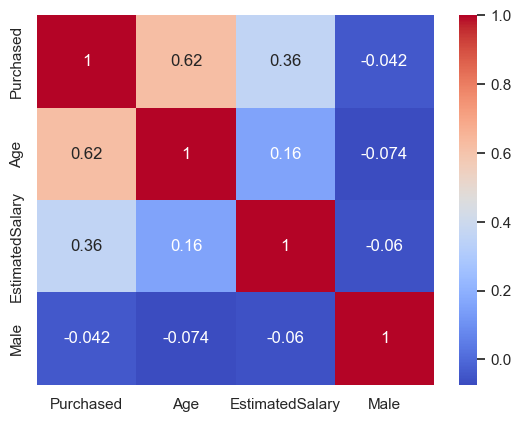

In [17]:
sns.heatmap(df.corr(), cmap='coolwarm',annot=True)
plt.show()

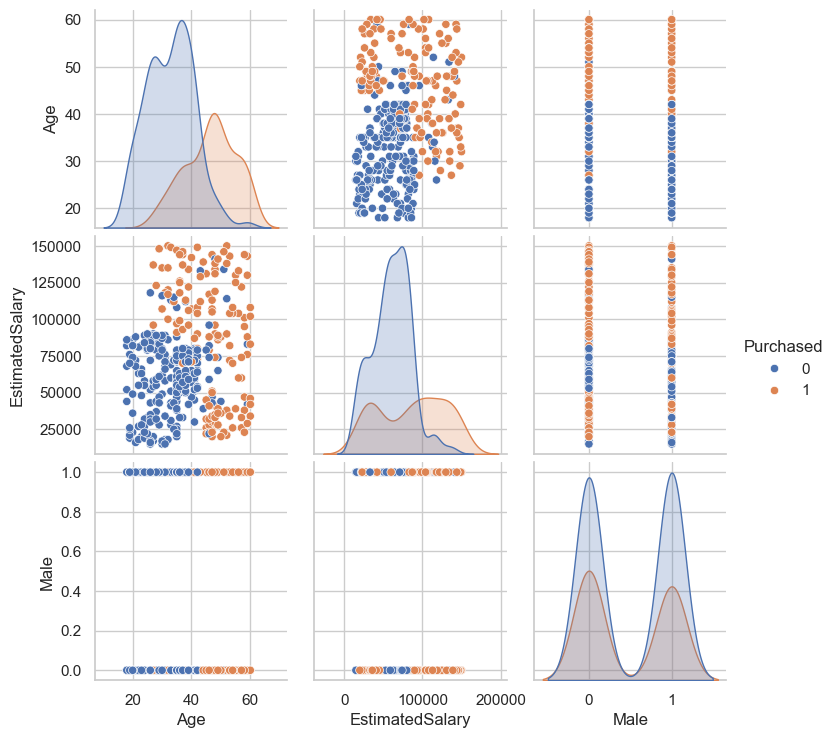

In [18]:
sns.set_style('whitegrid')
sns.pairplot(df, hue= 'Purchased')
plt.show()

### Defining the variables and splitting the data

In [19]:
y = df['Purchased']
X = df.drop('Purchased', axis=1) # becareful inplace= False

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=rand_state)

In [20]:
X_train.head()

,Age,EstimatedSalary,Male
269,40,61000,1
389,48,35000,0
232,40,107000,1
89,35,50000,1
236,40,57000,1


### Scaling the features: 


For tree based models, there is no need to scale the features!  Decision trees do not require feature scaling to perform well. This is because decision trees make decisions by splitting nodes based on the absolute values of features, not on their scaled versions.

###  DTs Classification with Sklearn

In [21]:
from sklearn.tree import DecisionTreeClassifier

### Decision Tree Parameters

The following table lists key parameters available for this purpose in the sklearn decision tree implementation. After introducing the most important parameters, we will illustrate how to use cross-validation to optimize the hyperparameter settings with respect to the bias-variance tradeoff and lower prediction errors:

| Parameter                | Default | Options                                                                                                                                                               | Description                                                                                                                                                                                                             |
|--------------------------|---------|-----------------------------------------------------------------------------------------------------------------------------------------------------------------------|-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| criterion                | gini    | Regression: MSE, MAE Classification: Gini impurity, Cross Entropy                                                                                                     | Metric to evaluate split quality.                                                                                                                                                                                       |
| splitter                 | best    | best, random                                                                                                                                                          | How to choose the split at each node. Supported strategies are “best” to choose the best split and “random” to choose the best random split.                                                                            |
| max_depth                | None    | int                                                                                                                                                                   | Max # of levels in tree. Split nodes until max_depth is reached or all leaves are pure or all leaves contain less than min_samples_split samples.                                                                       |
| max_features             | None    | None: max_features=n_features; int; float (fraction): int(max_features * n_features)  auto, sqrt: max_features=sqrt(n_features). log2: max_features=log2(n_features). | # of features to consider when evaluating split                                                                                                                                                                         |
| max_leaf_nodes           | None    | None: unlimited # of leaf nodes int                                                                                                                                   | Continue to split nodes that reduce relative impurity the most until reaching max_leaf_nodes.                                                                                                                           |
| min_impurity_decrease    | 0       | float                                                                                                                                                                 | Split node if impurity decreases by at least this value.                                                                                                                                                                |
| min_samples_leaf         | 1       | int; float (as percentage of N)                                                                                                                                       | Minimum # of samples to be at a leaf node. A split will only be considered if there are at least min_samples_leaf training samples in each of the left and right branches. May smoothen the model, esp. for regression. |
| min_samples_split        | 2       | int; float (as percentage of N)                                                                                                                                       | The minimum number of samples required to split an internal node:                                                                                                                                                       |
| min_weight_fraction_leaf | 0       | NA                                                                                                                                                                    | The minimum weighted fraction of the sum total of weights (of all the input samples) required to be at a leaf node. Samples have equal weight when sample_weight is not provided (in fit method).                       |
| class_weight             | None    | balanced: inversely proportional to class frequencies dict: {class_label: weight} list of dicts (for multi-output)                                                    | Weights associated with classes                                                                                                                                                                                         |

In [22]:
Tree_classifier = DecisionTreeClassifier()
Tree_classifier.fit(X_train, y_train)

DecisionTreeClassifier()

In [23]:
Tree_classifier.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': None,
 'splitter': 'best'}

In [24]:
# extracting the tree parameters:
Tree_classifier.tree_.max_depth

9

In [25]:
Tree_classifier.get_depth()

9

In [26]:
Tree_classifier.tree_.node_count

93

In [27]:
# Predicting the Test set classes
y_hat = Tree_classifier.predict(X_test)

In [28]:
y_hat_prob = Tree_classifier.predict_proba(X_test)[:,1]
y_hat_prob

array([0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 1., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 1., 0., 0.,
       0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0.])

(array([58.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 22.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

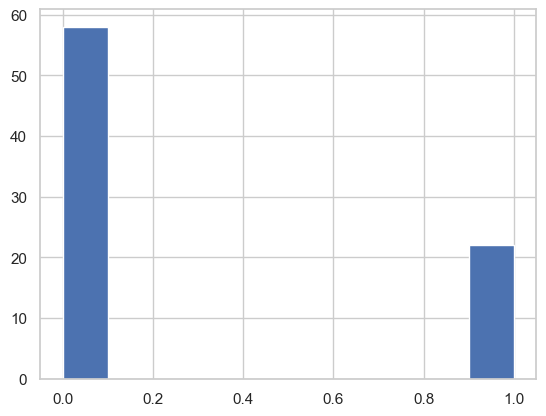

In [29]:
plt.hist(y_hat_prob)

----

## Performance metrics:

In [30]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score

#### Confusion matrix

In [31]:
print(confusion_matrix(y_test, y_hat))

[[44  4]
 [14 18]]


#### Built-in classification report

In [32]:
print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           0       0.76      0.92      0.83        48
           1       0.82      0.56      0.67        32

    accuracy                           0.78        80
   macro avg       0.79      0.74      0.75        80
weighted avg       0.78      0.78      0.76        80



---

## Pruning the tree using cost complexity pruning method. 
### Choosing $\alpha$ with cross validation. 

### Cost complexity Pruning

The cost_complexity_pruning_path method of a decision tree classifier in Python's scikit-learn library returns the effective alphas and the corresponding total leaf impurities at each step of the pruning process. This method is used for cost-complexity pruning of the tree, which is a way to avoid overfitting by reducing the size of the tree.

In [33]:
Tree_classifier = DecisionTreeClassifier()
path = Tree_classifier.cost_complexity_pruning_path(X_train,y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

path

{'ccp_alphas': array([0.        , 0.0015625 , 0.0020202 , 0.00203488, 0.00243056,
        0.0025    , 0.0025    , 0.00265625, 0.00273437, 0.00277778,
        0.00284091, 0.003125  , 0.00318723, 0.00357143, 0.00381731,
        0.00511297, 0.00775811, 0.008125  , 0.12078047, 0.18094607]),
 'impurities': array([0.003125  , 0.0046875 , 0.01074811, 0.01685276, 0.02657498,
        0.03157498, 0.03907498, 0.04438748, 0.04985623, 0.05541179,
        0.0610936 , 0.0673436 , 0.08327975, 0.09399404, 0.10162865,
        0.11185459, 0.13512893, 0.15137893, 0.27215939, 0.45310547])}

The ccp_alphas are calculated by the algorithm rather than being set manually. They are determined based on the structure and characteristics of the decision tree that is built from your data.

When you call the cost_complexity_pruning_path method, the algorithm goes through the tree and calculates these alpha values by evaluating the effect of pruning each node on the overall impurity of the tree. It's a data-driven process, and the resulting ccp_alphas are specific to the tree that was built from your dataset.

* The cost_complexity_pruning_path function generates a sequence of candidate values for alpha by exploring the pruning path from the largest subtree to the smallest subtree.
* The function then computes the effective value of alpha for each subtree as the difference in cost complexity between the parent subtree and the current subtree, divided by the number of leaves removed in the pruning step. The effective value of alpha for the largest subtree is set to zero.
* The function returns an array of the effective values of alpha for each subtree in the pruning path, which can be used to select the optimal value of alpha for pruning the decision tree.

In [34]:
from sklearn.model_selection import cross_val_score
import sklearn.metrics
#sorted(sklearn.metrics.SCORERS.keys())

In [35]:
ccp_alphas

array([0.        , 0.0015625 , 0.0020202 , 0.00203488, 0.00243056,
       0.0025    , 0.0025    , 0.00265625, 0.00273437, 0.00277778,
       0.00284091, 0.003125  , 0.00318723, 0.00357143, 0.00381731,
       0.00511297, 0.00775811, 0.008125  , 0.12078047, 0.18094607])

In [36]:
accuracy_cv =[]
for alpha in ccp_alphas:
    accuracy = cross_val_score(estimator = DecisionTreeClassifier(ccp_alpha=alpha), X = X_train, y = y_train, cv = 5 , scoring="accuracy")
    accuracy_cv.append(np.mean(accuracy))
    
output = pd.DataFrame(list(ccp_alphas), columns=['alpha'])
output['accuracy_CV']=accuracy_cv

output.head()

,alpha,accuracy_CV
0,0.000000,0.875000
1,0.001562,0.871875
2,0.002020,0.878125
3,0.002035,0.878125
4,0.002431,0.865625


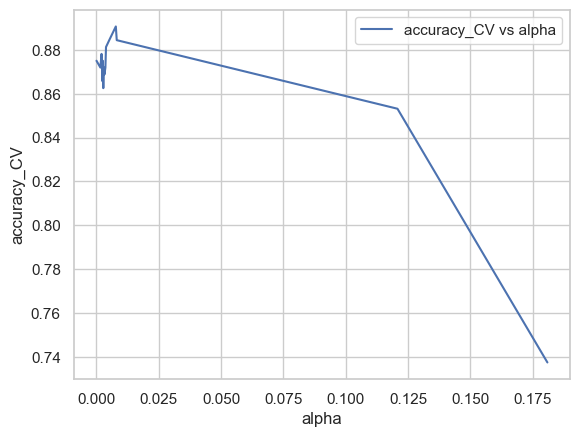

In [37]:
sns.lineplot(x='alpha', y='accuracy_CV', data=output , color='b', label="accuracy_CV vs alpha")
plt.show()

In [38]:
np.argmax(output['accuracy_CV'])

16

In [39]:
output.iloc[np.argmax(output['accuracy_CV']),]

alpha          0.007758
accuracy_CV    0.890625
Name: 16, dtype: float64

So the maximum accuracy is 89%.

In [40]:
optimal_alpha = output.iloc[np.argmax(output['accuracy_CV']),0]
optimal_alpha

0.00775811299863266

Refit the DTs classifier with optimal alpha!

In [41]:
optimal_DT = DecisionTreeClassifier(ccp_alpha=optimal_alpha)
optimal_DT.fit(X_train, y_train)
y_hat_opt = optimal_DT.predict(X_test)

We can extract some of the hyper parameters of the optimize model:

In [42]:
optimal_DT.get_params()

{'ccp_alpha': 0.00775811299863266,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': None,
 'splitter': 'best'}

In [43]:
optimal_DT.get_depth()

4

In [44]:
optimal_DT.get_n_leaves()

5

#### Confusion matrix

In [45]:
print(confusion_matrix(y_test, y_hat_opt))

[[45  3]
 [ 4 28]]


#### Built-in classification report

In [46]:
print(classification_report(y_test, y_hat_opt))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93        48
           1       0.90      0.88      0.89        32

    accuracy                           0.91        80
   macro avg       0.91      0.91      0.91        80
weighted avg       0.91      0.91      0.91        80



###  Cross validation

Now let's try to get an estimate for the accuracy of our model using cross validation technique. 

In [47]:
from sklearn.model_selection import cross_val_score

In [48]:
# remember we saved our model in an object called "Tree_classifier"
accuracy = cross_val_score(estimator = optimal_DT, X = X_train, y = y_train, cv = 5 , scoring="accuracy" )

In [49]:
accuracy

array([0.90625 , 0.90625 , 0.859375, 0.921875, 0.828125])

In [50]:
round(accuracy.mean(),3)

0.884

## Visualizing the Tree
4 different ways of visualizing a tree in Python: https://mljar.com/blog/visualize-decision-tree/

Plot DT with **plot_tree** method from sklearn. 

Let's visualize one simple tree with two features only. 


In [51]:
df.columns

Index(['Purchased', 'Age', 'EstimatedSalary', 'Male'], dtype='object')

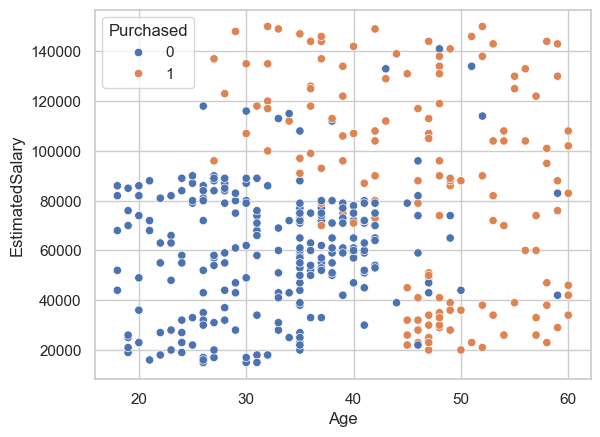

In [52]:
sns.scatterplot(x='Age', y='EstimatedSalary', data=df, hue='Purchased')
plt.show()

In [53]:
dtree= DecisionTreeClassifier(max_depth=2)
dtree.fit(X_train, y_train)
yhat = dtree.predict(X_test)

In [54]:
from sklearn.tree import plot_tree

In [55]:
X_train.shape

(320, 3)

In [56]:
X_train.head()

,Age,EstimatedSalary,Male
269,40,61000,1
389,48,35000,0
232,40,107000,1
89,35,50000,1
236,40,57000,1


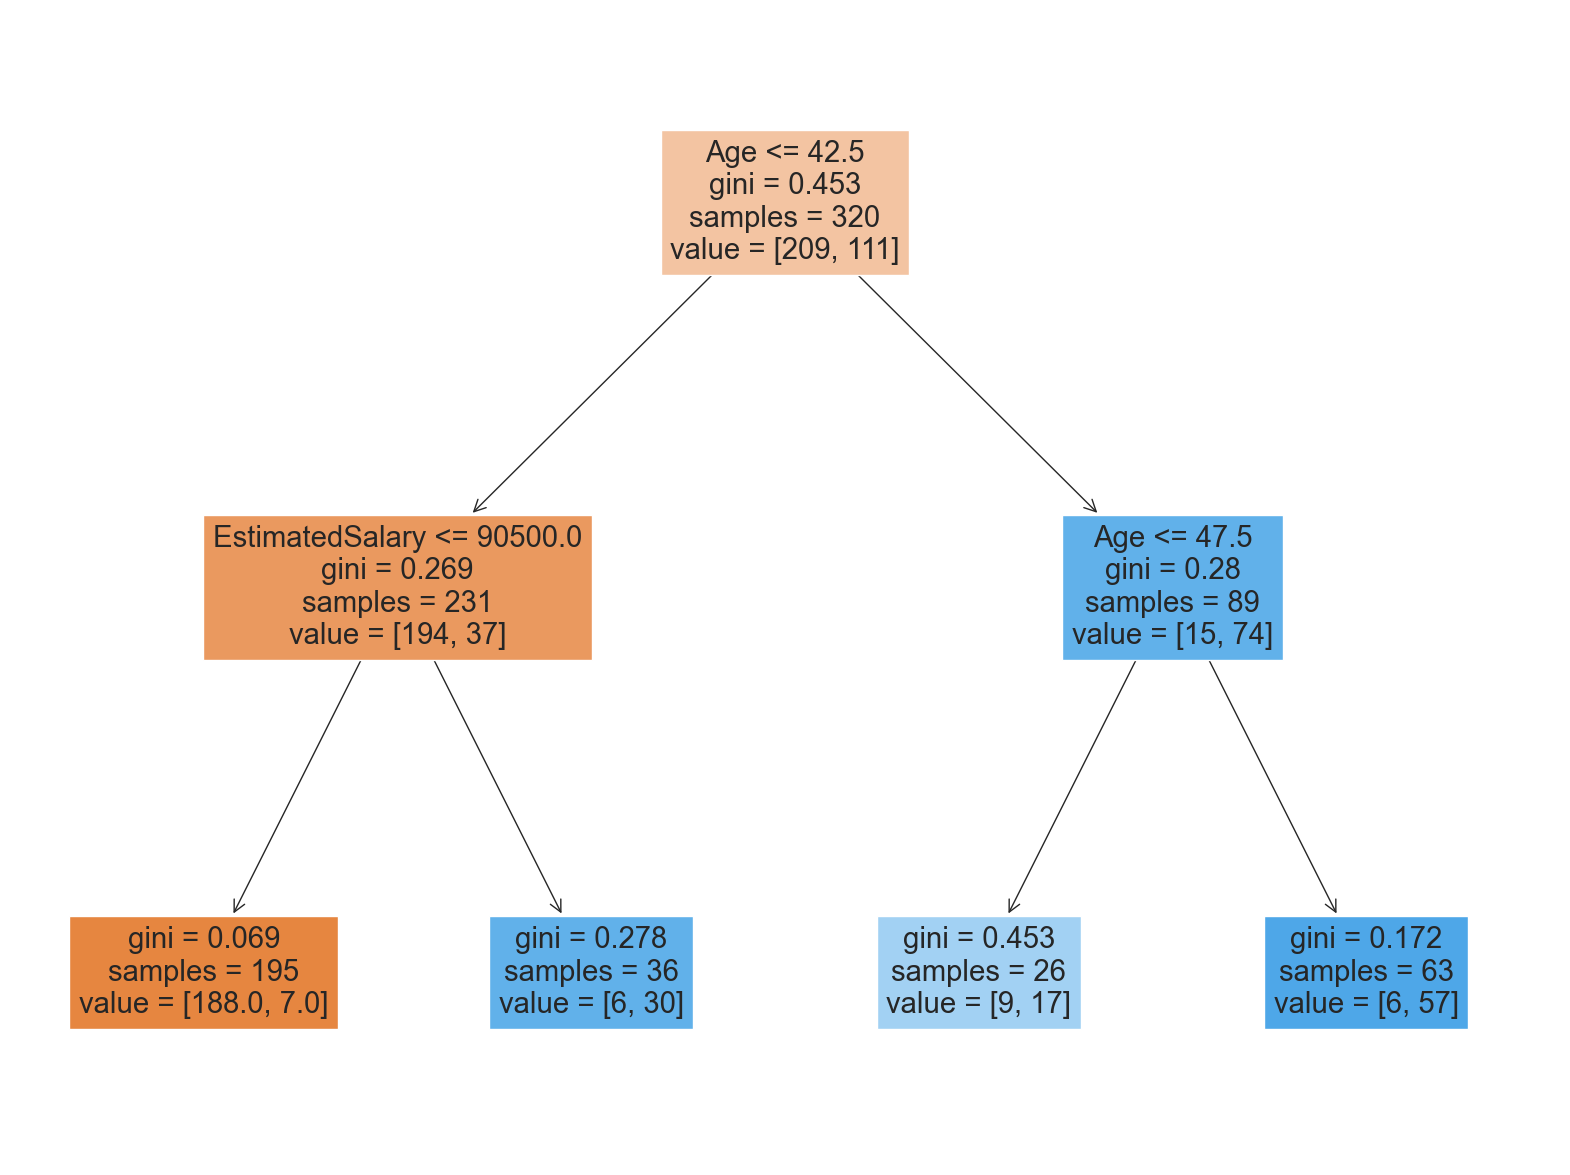

In [57]:
fig = plt.figure(figsize=(20,15))
DT_plot = plot_tree(dtree, feature_names=X_train.columns, filled=True)
# left branch True

In [58]:
fig.savefig("DT_plot_classification.png")

**Exercise**: 
Now try the optimal alpha and answer the following questions:
1. What is the level?
2. What is |T|?
3. How do you make sure that each terminal node has at least 50 boservations?

---
### Advance Visualization (this part is optional) 

Visualising the Training set results (in 2D of course!). We have to rerun the whole model with 2 explanatory variables

In [59]:
X= df[['Age', 'EstimatedSalary']]
y= df[['Purchased']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10)

In [60]:
# Feature Scaling: only for visualization purposes we need to scale the features. 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test) 

### Fitting Decision Tree classifier to the Training set

In [61]:
dtree = DecisionTreeClassifier(max_depth=2)
dtree.fit(X_train, y_train.values.reshape(-1,))
y_hat_vis = dtree.predict(X_test)

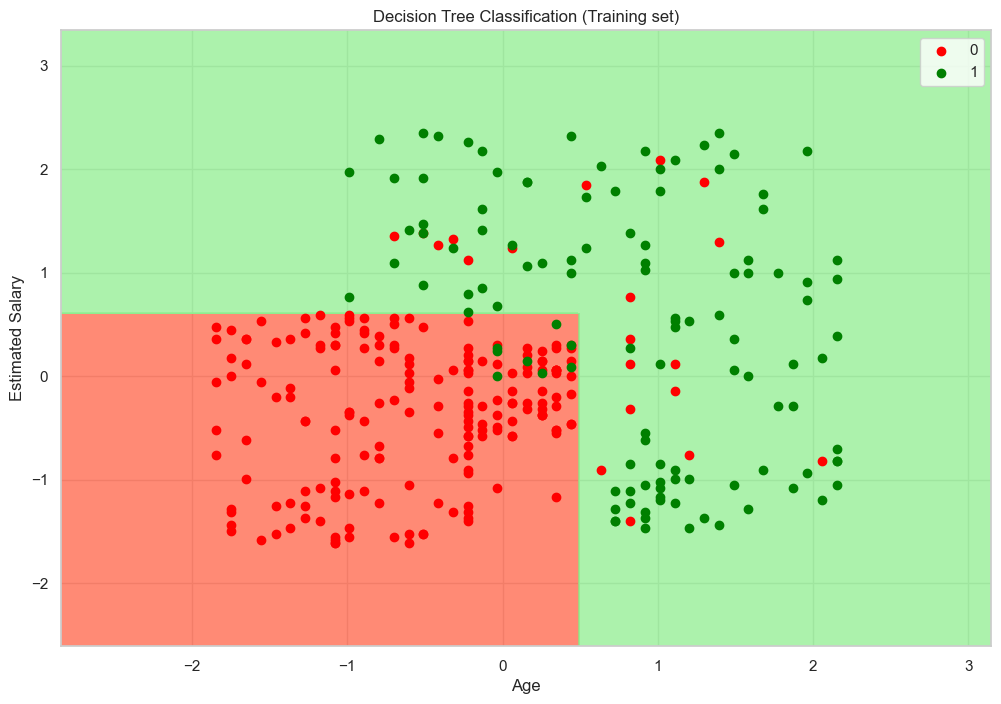

In [62]:
# visualization
plt.figure(figsize=(12,8))

X_set, y_set = X_train, y_train.iloc[:,0].values
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))


from matplotlib.colors import ListedColormap
plt.contourf( X1, X2 , dtree.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('#FF6347', '#90EE90')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Decision Tree Classification (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

**Exercise**
1. If you use max_depth=100, what is the accuracy in the training set? 



### Visualising the Test set results

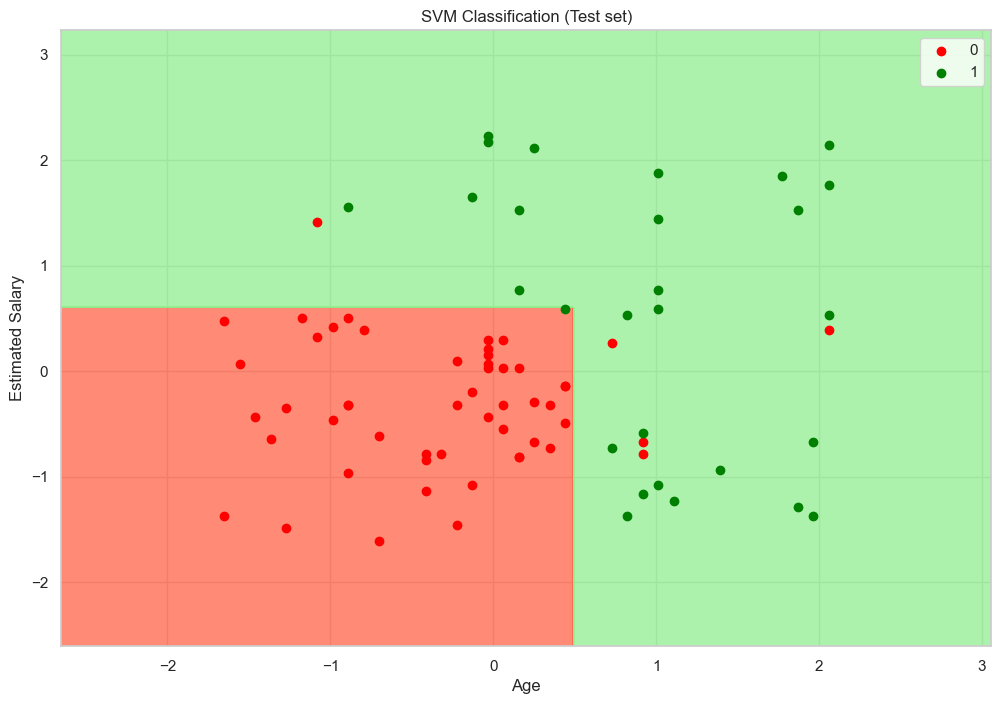

In [63]:
plt.figure(figsize=(12,8))

from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test.iloc[:,0].values
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, dtree.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('#FF6347', '#90EE90')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM Classification (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

In [64]:
print(confusion_matrix(y_test, y_hat_vis))

[[47  5]
 [ 1 27]]


---
---
# PyCaret

1. **PyCaret**: https://pycaret.readthedocs.io/en/latest/index.html PyCaret3.0
2. **scikit-learn**: https://scikit-learn.org/stable/index.html
3. **PyCaret model containers** : https://github.com/pycaret/pycaret/tree/master/pycaret/containers/models

# Installation

Follow the steps here: https://pycaret.gitbook.io/docs/get-started/installation


In [65]:
#only if you want to run it in Google Colab: 
# for this chapter, we can install the light version of PyCaret as below. 

# !pip install --pre pycaret

In [66]:
# if you got a warning that you need to "RESTART RUNTIME", go ahead and press that button. 

# let's double ckeck the Pycaret version: 
from pycaret.utils import version
version()

'3.3.2'

In [67]:
df_py = pd.read_csv('https://raw.githubusercontent.com/PJalgotrader/Machine_Learning-USU/main/data/Social_Network_Ads.csv')

In [68]:
df_py.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [69]:
from pycaret.classification import *


In [70]:
setup(data=df_py,  target='Purchased',ignore_features=['User ID'] , session_id=555, train_size=0.7, preprocess=True, categorical_features= ['Gender'])


,Description,Value
0,Session id,555
1,Target,Purchased
2,Target type,Binary
3,Original data shape,"(400, 5)"
4,Transformed data shape,"(400, 4)"
5,Transformed train set shape,"(280, 4)"
6,Transformed test set shape,"(120, 4)"
7,Ignore features,1
8,Numeric features,2
9,Categorical features,1


In [71]:
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


## Create and tune model

In [72]:
dt = create_model(estimator='dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8929,0.8722,0.8000,0.8889,0.8421,0.7614,0.7638
1,0.8571,0.8444,0.8000,0.8000,0.8000,0.6889,0.6889
2,0.9286,0.9444,1.0000,0.8333,0.9091,0.8511,0.8607
3,0.8929,0.8722,0.8000,0.8889,0.8421,0.7614,0.7638
4,0.8929,0.8944,0.9000,0.8182,0.8571,0.7717,0.7740
5,0.9643,0.9722,1.0000,0.9091,0.9524,0.9239,0.9266
6,0.8214,0.8167,0.8000,0.7273,0.7619,0.6196,0.6214
7,0.8214,0.8167,0.8000,0.7273,0.7619,0.6196,0.6214
8,0.7857,0.7667,0.7000,0.7000,0.7000,0.5333,0.5333


In [73]:
tuned_dt = tune_model(dt)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9286,0.9639,0.9000,0.9000,0.9000,0.8444,0.8444
1,0.8571,0.8444,0.7000,0.8750,0.7778,0.6744,0.6835
2,0.8929,0.9500,0.9000,0.8182,0.8571,0.7717,0.7740
3,0.9643,1.0000,1.0000,0.9091,0.9524,0.9239,0.9266
4,0.8929,0.9722,0.9000,0.8182,0.8571,0.7717,0.7740
5,0.8929,0.9722,1.0000,0.7692,0.8696,0.7812,0.8006
6,0.8929,0.8889,0.8000,0.8889,0.8421,0.7614,0.7638
7,0.7857,0.9000,0.7000,0.7000,0.7000,0.5333,0.5333
8,0.8571,0.8500,0.7000,0.8750,0.7778,0.6744,0.6835


Fitting 10 folds for each of 10 candidates, totalling 100 fits


## Plot Model


In [74]:
plot_model(tuned_dt, plot = 'parameter')

,Parameters
ccp_alpha,0.0
class_weight,None
criterion,entropy
max_depth,10
max_features,1.0
max_leaf_nodes,None
min_impurity_decrease,0.0002
min_samples_leaf,6
min_samples_split,5
min_weight_fraction_leaf,0.0


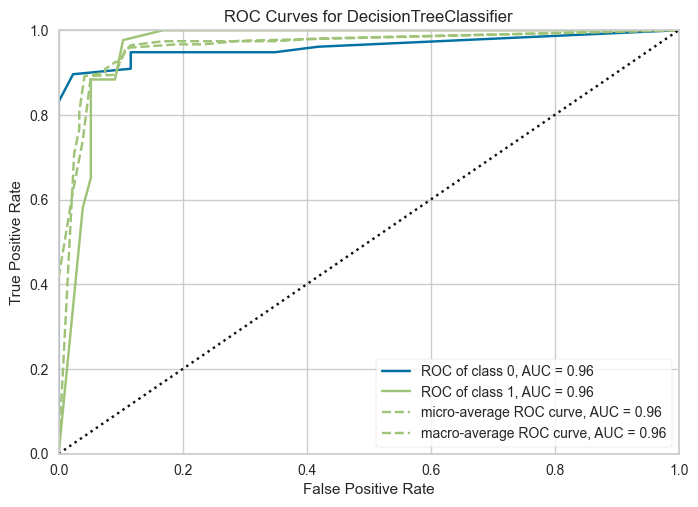

In [229]:
plot_model(tuned_dt, plot = 'auc')

the macro-average ROC curve calculates the TPR and FPR separately for each class, and then averages these values across all classes. Micro-average however, is the weighted average version! 

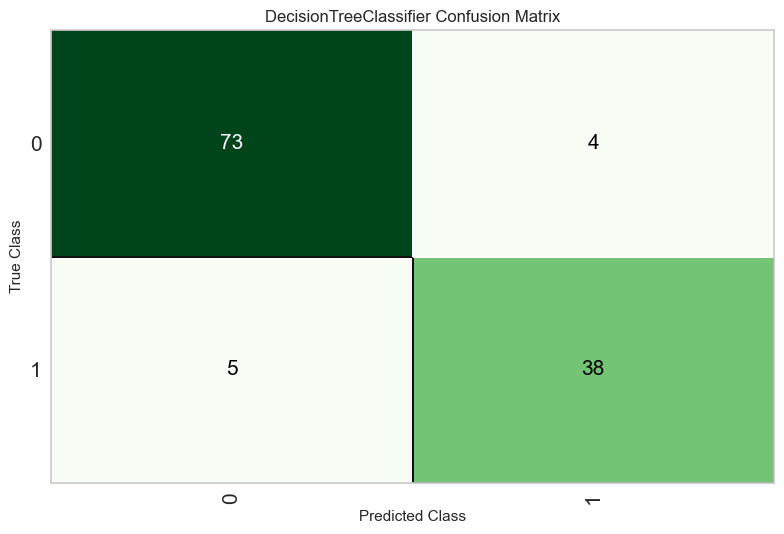

In [75]:
plot_model(tuned_dt, plot = 'confusion_matrix')

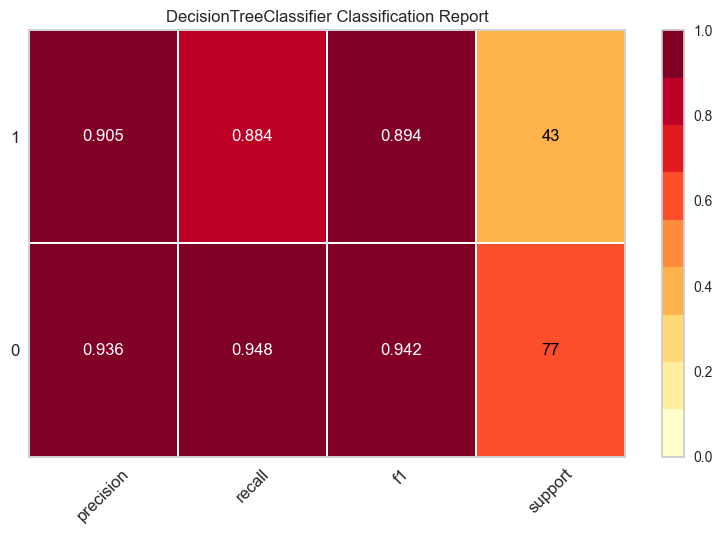

In [76]:
plot_model(tuned_dt, plot = 'class_report')

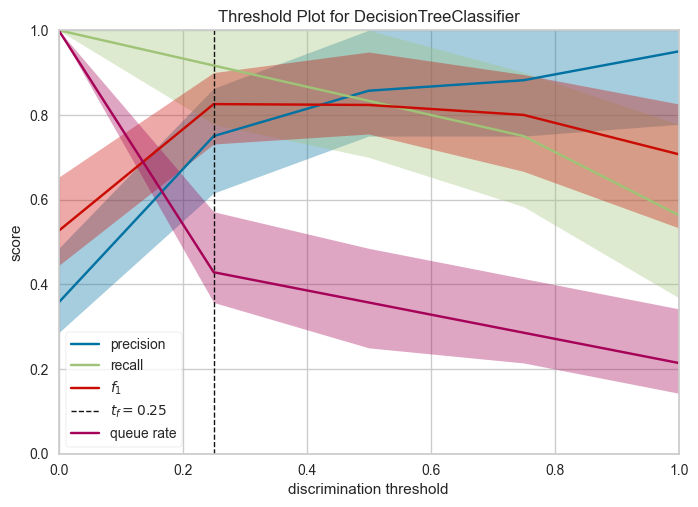

In [77]:
plot_model(tuned_dt, plot = 'threshold')

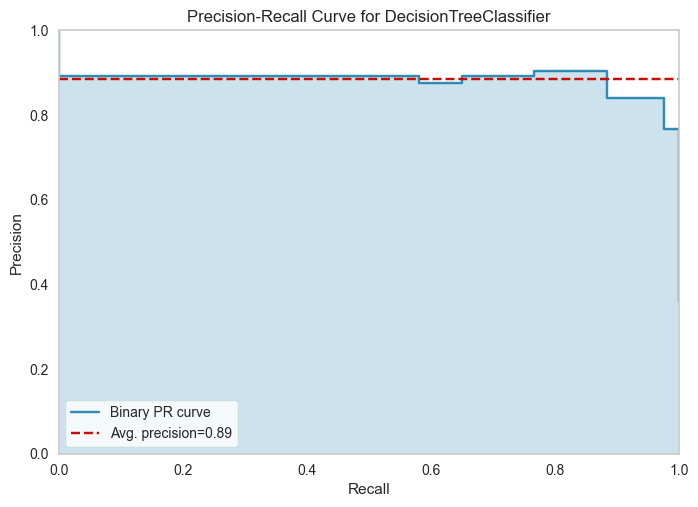

In [78]:
plot_model(tuned_dt, plot = 'pr')

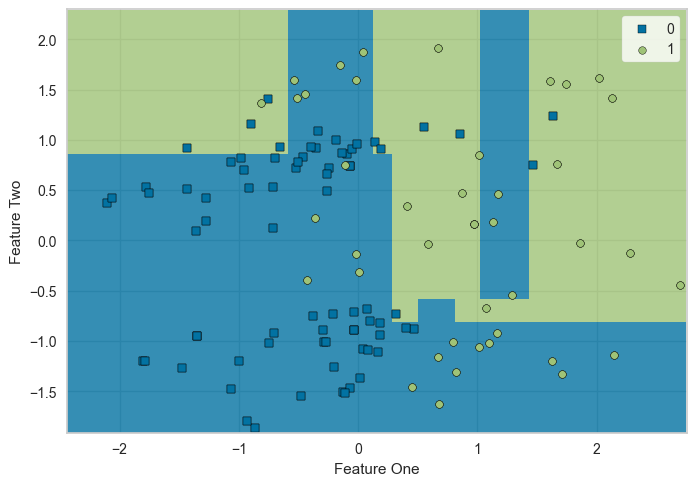

In [79]:
plot_model(tuned_dt, plot = 'boundary')

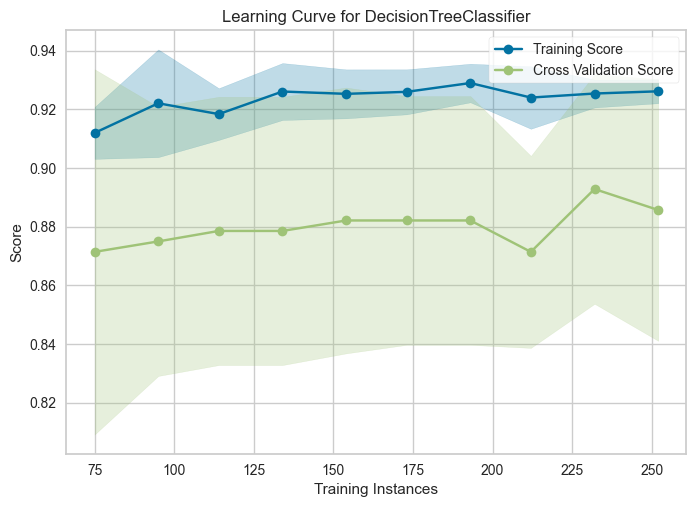

In [80]:
plot_model(tuned_dt, plot = 'learning')

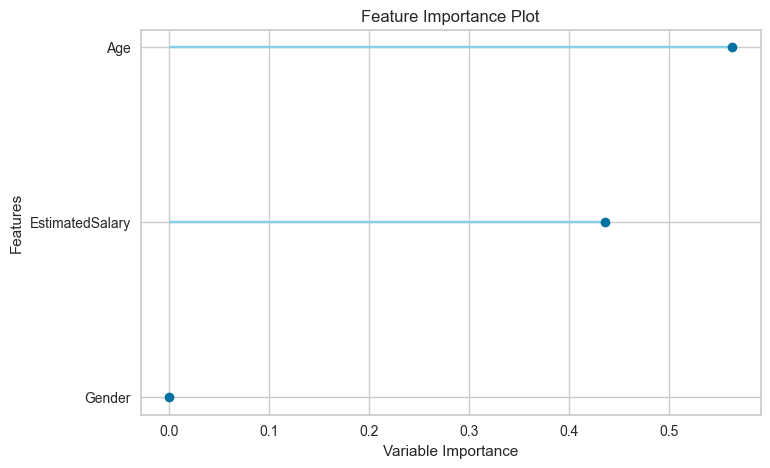

In [81]:
plot_model(tuned_dt, plot = 'feature')

----
Done!

###  Additional links:


1. Decision Trees with sklearn: https://scikit-learn.org/stable/modules/tree.html
2. Decision Trees visualization: https://mljar.com/blog/visualize-decision-tree/
